In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use("fivethirtyeight")
plt.style.use("seaborn-v0_8-pastel")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df_copy = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 1.What is the distribution of age among heart failure patients in the dataset ?

The average age of heart failure patients is 60 years, with a standard deviation of 11 years. The youngest patient is 40 years old, and the oldest patient is 95 years old. The age distribution of heart failure patients is shown in the histogram below. The age distribution is right-skewed, with most patients between 40 and 70 years old.

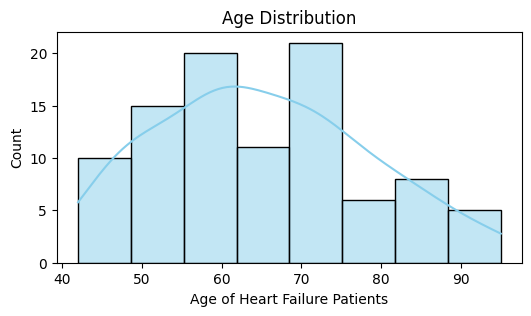

In [26]:
age_of_heart_failure_patients = df[df['DEATH_EVENT']==1]['age']
plt.figure(figsize=(6,3))
sns.histplot(age_of_heart_failure_patients, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age of Heart Failure Patients')
plt.ylabel('Count')
plt.show()


### 2. How does the death rate vary with age ?

The death rate among heart failure patients increases with age. Patients who died were older on average (60 years) than patients who survived. The death rate was highest among patients aged around 40-50 years, with over 25% of patients in this age group dying. The death rate was lowest among patients aged 90-100 years, with less than 5% of patients in this age group dying.

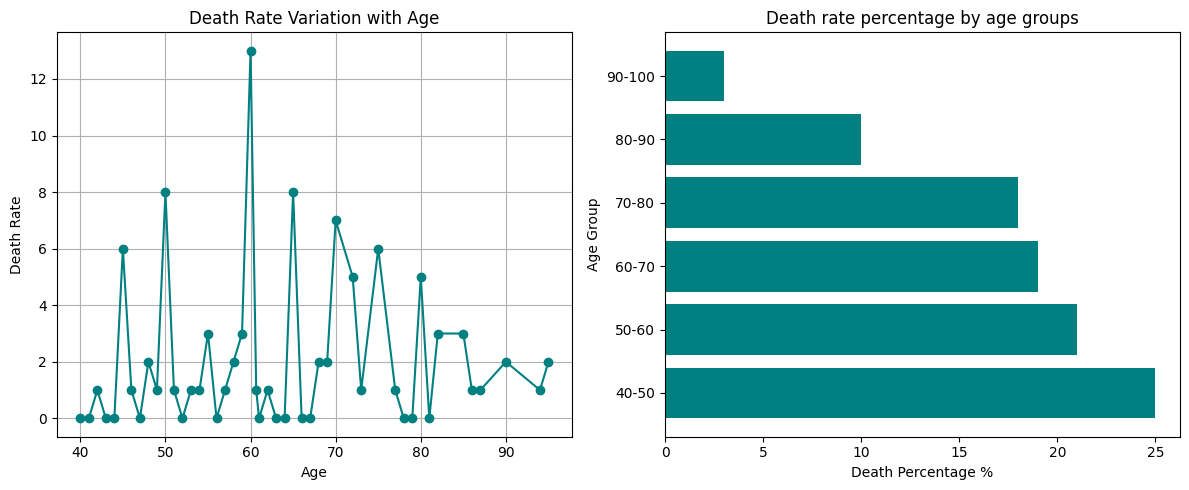

In [27]:
death_rate_by_age = df.groupby('age')['DEATH_EVENT'].sum().reset_index()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(death_rate_by_age['age'], death_rate_by_age['DEATH_EVENT'], marker='o', linestyle='-', color='teal')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.title('Death Rate Variation with Age')
plt.grid(True)


plt.subplot(1,2,2)
bins = [40, 50, 60, 70, 80, 90, 100]
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_groups = pd.cut(df['age'], bins=bins, labels=age_labels, right=True).value_counts()
death_by_age_group = pd.cut(df[df['DEATH_EVENT']==1]['age'], bins=bins, labels=age_labels).value_counts()
death_rate_percentage_by_age_group = (age_groups/death_by_age_group)*100
plt.barh(y = age_labels, width=death_by_age_group, color='teal')
plt.title('Death rate percentage by age groups')
plt.xlabel('Death Percentage %')
plt.ylabel('Age Group')

plt.tight_layout()
plt.show()


### 3. What is the percentage of male and female patients in the dataset ?


In [28]:
print(f'Percentage of MALE Patients in the dataset: {round(sum(df.sex == 1)/df.sex.count() * 100,2)} %')
print(f'Percentage of FEMALE Patients in the dataset: {round(sum(df.sex == 0)/df.sex.count()* 100,2)} %')


Percentage of MALE Patients in the dataset: 64.88 %
Percentage of FEMALE Patients in the dataset: 35.12 %


### 4. How does the platelet count vary among different age groups? 


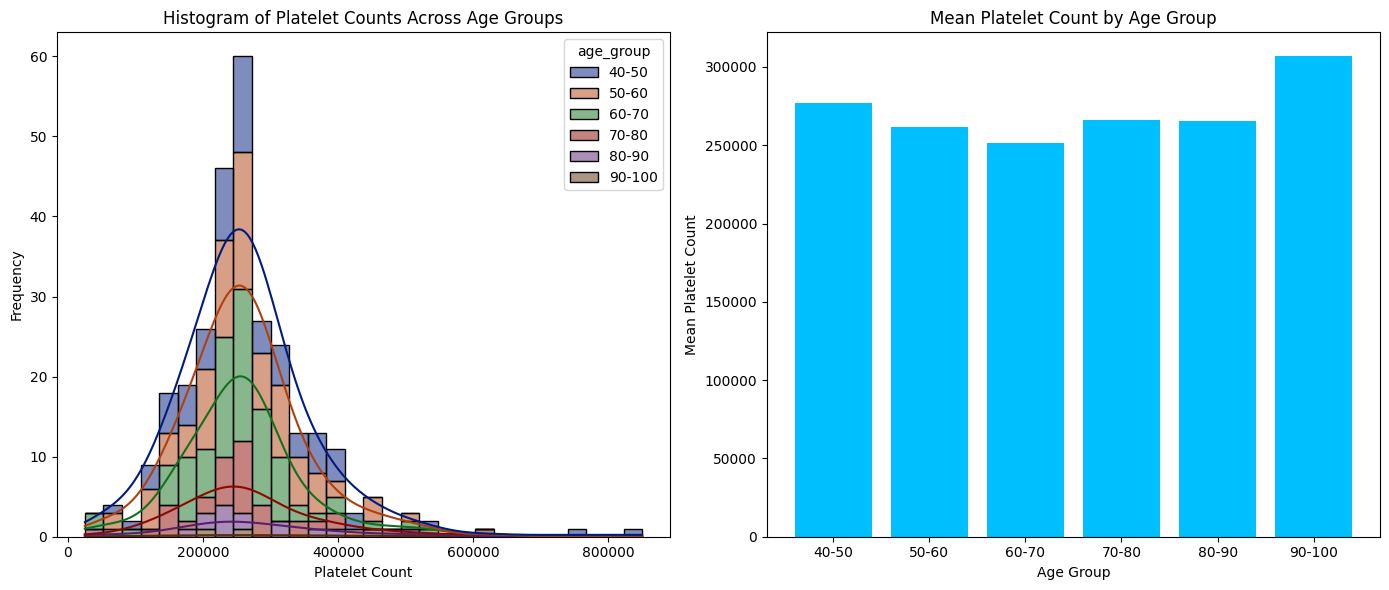

In [79]:
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_group'] = pd.cut(df['age'], bins=[40,50,60,70,80,90,100], labels=age_labels)
platelet_count_by_age_group = df.groupby('age_group')['platelets'].mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 
sns.histplot(data=df, x='platelets', hue='age_group', kde=True, multiple='stack', ax=ax[0], palette='dark')
ax[0].set_title('Histogram of Platelet Counts Across Age Groups')
ax[0].set_xlabel('Platelet Count')
ax[0].set_ylabel('Frequency')

ax[1].bar(x=age_labels, height=platelet_count_by_age_group, color='deepskyblue')
ax[1].set_title('Mean Platelet Count by Age Group')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Mean Platelet Count')

plt.tight_layout() 
plt.show()


In [75]:
sns.dark_palette

<function seaborn.palettes.dark_palette(color, n_colors=6, reverse=False, as_cmap=False, input='rgb')>

 The median (50th percentile) platelet count is relatively consistent across age groups, suggesting a similar central tendency. The minimum platelet count is found in age group 60-70 and maximum platelet count is found in age group 40-50 although on an average platelet count is higher in age group 90-100

### 5. Is there a correlation between creatinine and sodium levels in the blood?
Yes, there is a week negative correlation between creatinine and sodium . As one variable tends to increase the other variable tends to decrease

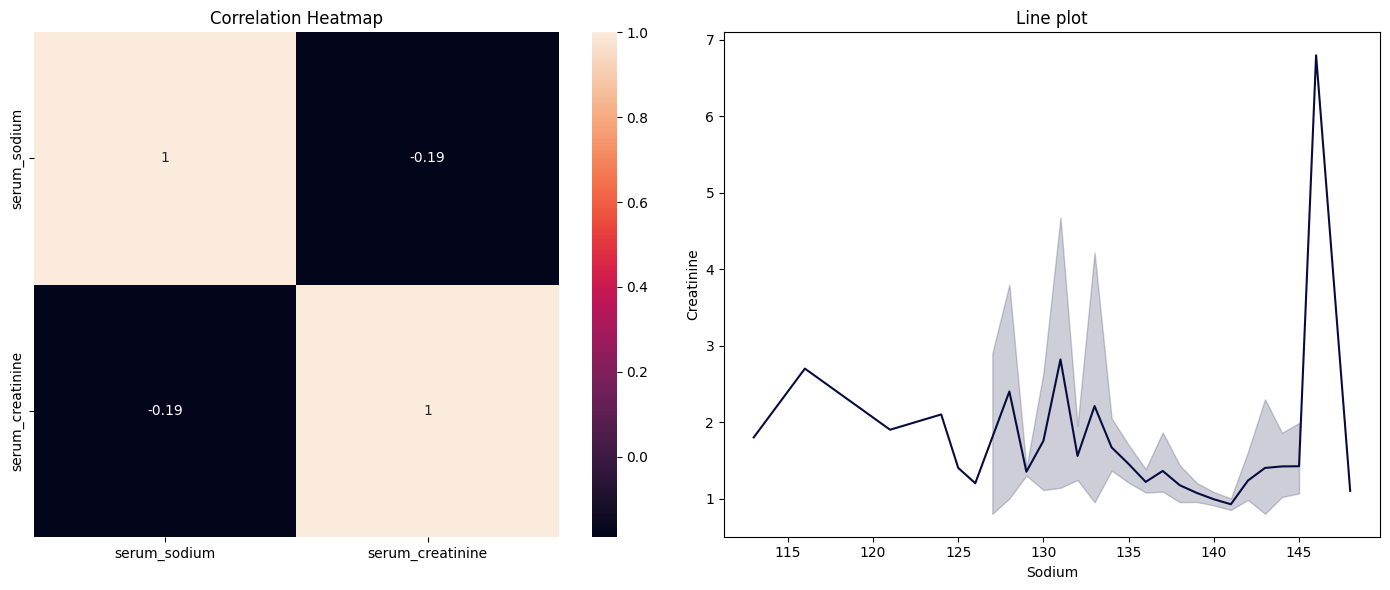

In [66]:
corr_sodium_creatinine = df.serum_creatinine.corr(df['serum_sodium'])

fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.heatmap(data=df[['serum_sodium', 'serum_creatinine']].corr(), ax=ax[0], annot=True)
ax[0].set_title('Correlation Heatmap')

sns.lineplot(x = df['serum_sodium'], y= df['serum_creatinine'],ax=ax[1], color='#070c40')
ax[1].set_title('Line plot')
ax[1].set_xlabel('Sodium')
ax[1].set_ylabel('Creatinine')

plt.tight_layout()
plt.show()

### 6.  How does the prevalence of high blood pressure differ between male and female patients?

There is higher chance(40 %) in Females of having a high blood pressure as compare to Men who have 30% chance of having a hight blood pressure

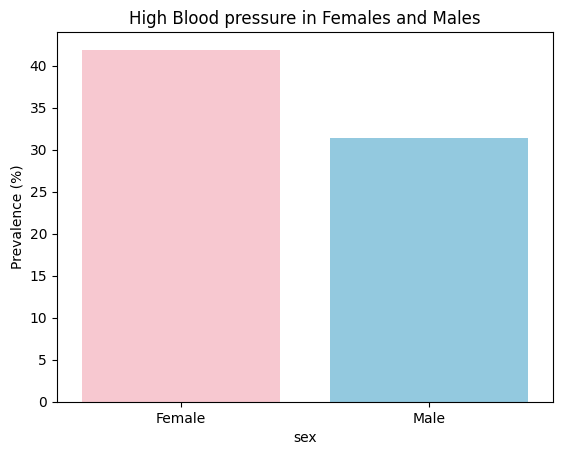

In [103]:
pressure_prevelance = df.groupby('sex')['high_blood_pressure'].mean()*100
sns.barplot( x = pressure_prevelance.index, y=pressure_prevelance.values, palette=['pink', 'skyblue'])
plt.title('High Blood pressure in Females and Males')
plt.ylabel('Prevalence (%)')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.show()

### 7. What is the relationship between smoking habits and the occurrence of heart failure ?
There is no relation found between smoking habits and heart failures as both category of people (smoker and non-smoker) have almost equal chances of having a Heart failure. There is an interesting statistics as well, higher number of people who died due to heart failure were non-smokers

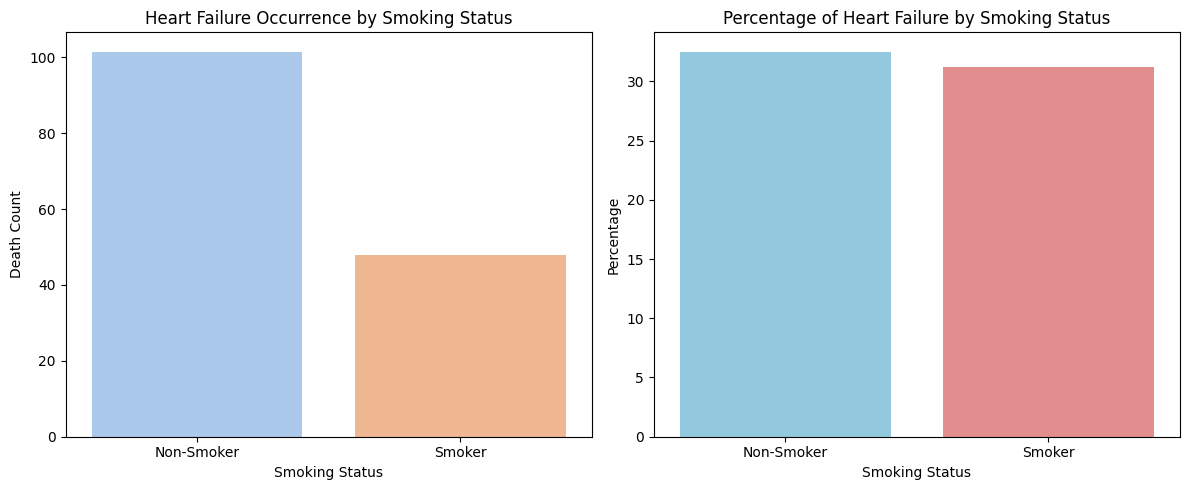

In [80]:

death_event_counts = df.groupby('smoking')['DEATH_EVENT'].value_counts().unstack()
death_event_percentage = (df.groupby('smoking')['DEATH_EVENT'].mean() * 100).reset_index()

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(data=death_event_counts, palette='pastel', ci=None)
plt.title('Heart Failure Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Death Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])


plt.subplot(1, 2, 2)
sns.barplot(x='smoking', y='DEATH_EVENT', data=death_event_percentage, palette=['skyblue', 'lightcoral'])
plt.title('Percentage of Heart Failure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.tight_layout()
plt.show()

### 8. Are there any noticeable patterns in the distribution of death events across different age groups ?

Yes, The Death percentage of people below age 60 years is low, but as the age group increases from 60-70 yrs, the death percentage increases by 50% and so on and becomes 100% in age group 90-100

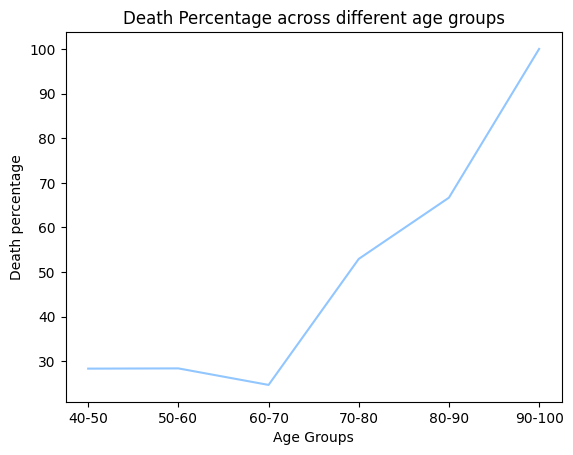

In [89]:
death_by_age_group = df.groupby('age_group')['DEATH_EVENT'].mean()*100
sns.lineplot(data=death_by_age_group)
plt.title('Death Percentage across different age groups')
plt.xlabel('Age Groups')
plt.ylabel('Death percentage')
plt.show()

### 9.  Is there any significant difference in ejection fraction between patients with and without diabete ?

No, there is not significant difference between ejection fraction between Diabetic patients and Non-Diabetic patients as both their mean are nearly equal



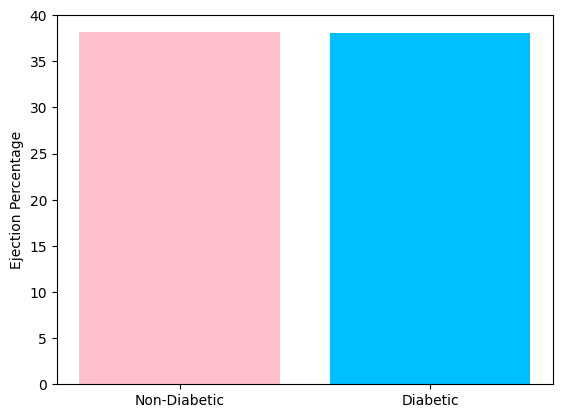

In [82]:
ejection_fraction = df.groupby('diabetes')['ejection_fraction'].mean()
plt.bar(x = ['Non-Diabetic', 'Diabetic'], height=ejection_fraction.values, color=['pink', 'deepskyblue'])
plt.ylabel('Ejection Percentage')
plt.show()

In [83]:
ejection_fraction.index

Int64Index([0, 1], dtype='int64', name='diabetes')

###  10. How does the serum creatinine level vary between patients who survived and those who did not?

The patient who survived on an average has less amount of serum creatinine as compared to patient who died. The maximum creatinine found in patient who survived was - 6.1 and who died was - 9.4

In [84]:
creatinine_in_death_events = df.groupby('DEATH_EVENT')['serum_creatinine'].describe()
creatinine_in_death_events

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1
1,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4


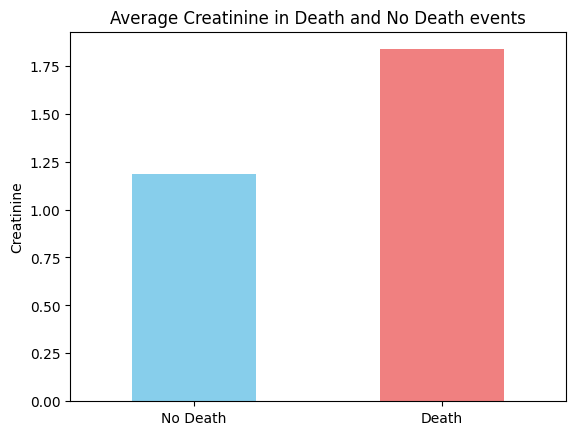

In [85]:
creatinine_in_death_events['mean'].plot(kind='bar', color = ['skyblue', 'lightcoral'])
plt.title('Average Creatinine in Death and No Death events')
plt.ylabel('Creatinine')
plt.xlabel('')
plt.xticks(ticks=[0,1], labels=['No Death', 'Death'], rotation=0)
plt.show()